**UVOD**

Za projektno nalogo sem poskušal narediti model, ki napove potencialno odpoved diska na podlagi SMART scan-a, ki ga lahko izvedemo nad vsakim diskom.

Model deluje na podlagi podatkov 57 razlicnih proizvajalcev, podatki so merili te diske 1 leto, vsak dan po ena meritev.

Celotna podatkovna mnozica ima 8828 instanc (SMART scan-ov). Od tega jih je polovico z lasnostjo failure=1 (uravnotezena podatkovna mnozica), druga polovica zdravih diskov pa je nakljucno vzeta iz celotnega leta (2025). Vse podatke bi bilo vključiti nemogoče, saj imajo skupaj 32 milihjonov instanc, od katerih je le par % dejansko pokvarjenih diskov (4414)

**POMEMBNI STOLPCI IN ODVPOVEDI**

,smart_5_raw,smart_187_raw,smart_188_raw
0,0.0,NaN,NaN
1,NaN,NaN,NaN
2,2657.0,NaN,NaN
3,144.0,683.0,4.295361e+09
4,843.0,NaN,NaN
...,...,...,...
8823,0.0,NaN,NaN
8824,0.0,NaN,NaN
8825,0.0,NaN,NaN
8826,0.0,NaN,NaN


smart_5_raw        65
smart_187_raw    5555
smart_188_raw    5563
dtype: int64

,date,serial_number,model,capacity_bytes,failure,datacenter,cluster_id,vault_id,pod_id,pod_slot_num,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
1,2025-04-27,D7JDTYHN,HGST HUH721212ALE604,12000138625024,1,phx1,0,1059,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-04,QGK9NWST,WDC WUH721414ALE6L4,14000519643136,1,sac2,0,1152,18,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-28,ZHZ3CQL6,ST14000NM0138,14000519643136,1,sac0,0,1154,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-14,1180A03AF97G,TOSHIBA MG07ACA14TA,14000519643136,1,sac2,0,1160,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-11-14,6250A0N8FVKG,TOSHIBA MG08ACA16TA,16000900661248,1,iad1,50,1004,5,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8819,2025-09-24,81K0A0BAFV8G,TOSHIBA MG08ACA16TEY,16000900661248,1,ams5,31,2017,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8820,2024-10-14,ZL2LN4XM,ST16000NM001G,16000900661248,1,phx1,40,2007,16,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8821,2025-09-16,X880A0HBF97G,TOSHIBA MG07ACA14TA,14000519643136,1,phx1,0,1063,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8823,2025-05-28,8CH0VY3E,HGST HUH721212ALN604,12000138625024,1,sac2,0,1126,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


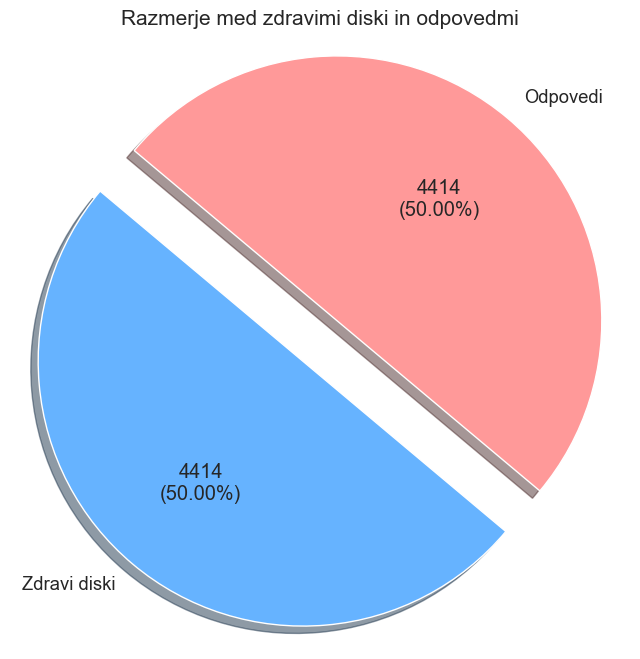

In [161]:
import np
import pandas as pd

df = pd.read_csv('koncniPodatkiZaModel.csv', sep=',')

pomembni = df[['smart_5_raw','smart_187_raw','smart_188_raw']]
display(pomembni)
display(pomembni.isnull().sum())

odpovedi = df.loc[df['failure'] == 1]
display(odpovedi)

#PRIKAZ ODPOVEDI

import matplotlib.pyplot as plt
import seaborn as sns

st_zdravih = (df['failure'] == 0).sum()
st_odpovedi = (df['failure'] == 1).sum()

labels = ['Zdravi diski', 'Odpovedi']
sizes = [st_zdravih, st_odpovedi]
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.2)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct=lambda p: '{:.0f}\n({:.2f}%)'.format(p * sum(sizes) / 100, p),
        startangle=140, shadow=True)

plt.title('Razmerje med zdravimi diski in odpovedmi', fontsize=15)
plt.axis('equal')
plt.show()

**Rough Preprocessing**

odstranjevanje vecine NaN vrednosti, fokus na pomembne stolpce, ....

,date,serial_number,model,capacity_bytes,failure,datacenter,cluster_id,vault_id,pod_id,pod_slot_num,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2025-04-08,1ZG0WX3D,WDC WUH722222ALE6L4,22000969973760,0,iad1,50,1021,0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-04-27,D7JDTYHN,HGST HUH721212ALE604,12000138625024,1,phx1,0,1059,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-04,QGK9NWST,WDC WUH721414ALE6L4,14000519643136,1,sac2,0,1152,18,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-28,ZHZ3CQL6,ST14000NM0138,14000519643136,1,sac0,0,1154,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-14,1180A03AF97G,TOSHIBA MG07ACA14TA,14000519643136,1,sac2,0,1160,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(8828, 197)

Obdržali bomo 42 stolpcev.


(8828, 42)

,date,serial_number,model,capacity_bytes,failure,datacenter,cluster_id,vault_id,pod_id,is_legacy_format,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2025-04-08,1ZG0WX3D,WDC WUH722222ALE6L4,22000969973760,0,iad1,50,1021,0,False,...,100.0,540.0,57.0,38.0,100.0,0.0,100.0,0.0,100.0,0.0
1,2025-04-27,D7JDTYHN,HGST HUH721212ALE604,12000138625024,1,phx1,0,1059,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-04,QGK9NWST,WDC WUH721414ALE6L4,14000519643136,1,sac2,0,1152,18,False,...,99.0,7679.0,65.0,30.0,100.0,0.0,100.0,0.0,100.0,0.0
3,2025-02-28,ZHZ3CQL6,ST14000NM0138,14000519643136,1,sac0,0,1154,3,False,...,99.0,2597.0,29.0,29.0,94.0,3040.0,94.0,3040.0,200.0,0.0
4,2025-01-14,1180A03AF97G,TOSHIBA MG07ACA14TA,14000519643136,1,sac2,0,1160,16,False,...,100.0,113.0,100.0,33.0,100.0,5.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,2025-05-28,8CH0VY3E,HGST HUH721212ALN604,12000138625024,1,sac2,0,1126,12,False,...,99.0,2023.0,166.0,36.0,100.0,1711.0,100.0,0.0,200.0,0.0
8824,2025-01-19,70X0A03QF97G,TOSHIBA MG07ACA14TA,14000519643136,0,sac2,0,1159,16,False,...,100.0,138.0,100.0,32.0,100.0,0.0,100.0,0.0,200.0,0.0
8825,2025-07-31,8160A01YFVKG,TOSHIBA MG08ACA16TA,16000900661248,0,phx1,0,1415,9,False,...,100.0,17.0,100.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0
8826,2025-05-07,41D0A0FUFV8G,TOSHIBA MG08ACA16TEY,16000900661248,1,ams5,31,2008,14,False,...,100.0,70.0,100.0,34.0,NaN,NaN,100.0,0.0,200.0,0.0


(8828, 21)

Index(['model', 'capacity_bytes', 'failure', 'smart_1_raw', 'smart_3_raw',
       'smart_4_raw', 'smart_5_raw', 'smart_7_raw', 'smart_9_raw',
       'smart_10_raw', 'smart_12_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_190_raw', 'smart_191_raw', 'smart_192_raw', 'smart_193_raw',
       'smart_194_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw'],
      dtype='object')

                  model  capacity_bytes  failure  smart_1_raw  smart_3_raw  \
0   WDC WUH722222ALE6L4  22000969973760        0          0.0        220.0   
1  HGST HUH721212ALE604  12000138625024        1          NaN          NaN   
2   WDC WUH721414ALE6L4  14000519643136        1    2359296.0         73.0   
3         ST14000NM0138  14000519643136        1   99008840.0          0.0   
4   TOSHIBA MG07ACA14TA  14000519643136        1          0.0       7815.0   

   smart_4_raw  smart_5_raw  smart_7_raw  smart_9_raw  smart_10_raw  ...  \
0         16.0          0.0          0.0       7803.0           0.0  ...   
1          NaN          NaN          NaN          NaN           NaN  ...   
2          6.0       2657.0          0.0      36453.0           0.0  ...   
3         30.0        144.0   41588433.0      37502.0           0.0  ...   
4          8.0        843.0          0.0      34002.0           0.0  ...   

   smart_187_raw  smart_188_raw  smart_190_raw  smart_191_raw  smart_192_r

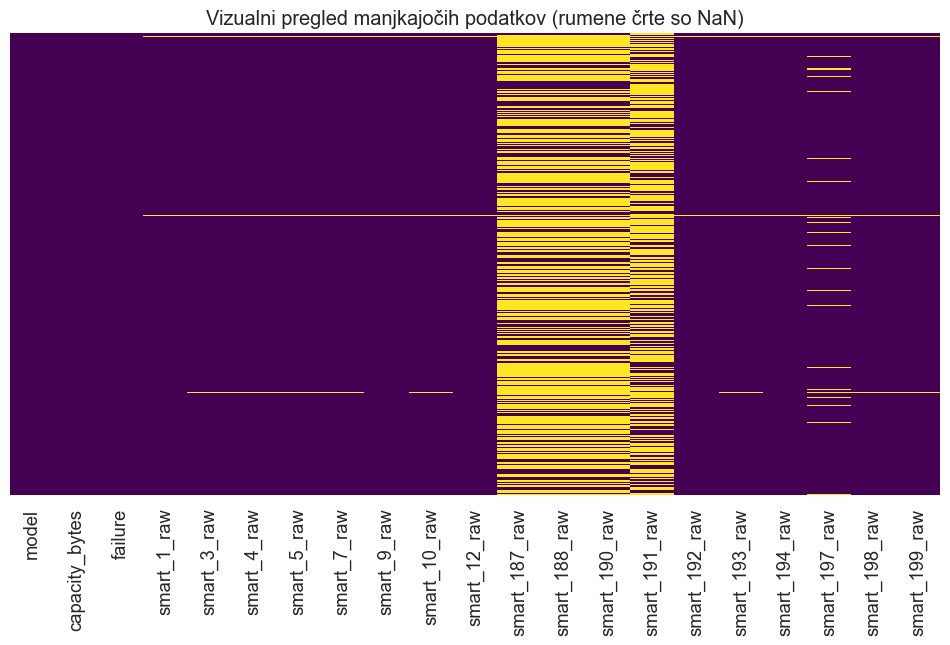

In [162]:
import pandas as pd

df = pd.read_csv('koncniPodatkiZaModel.csv', sep=',')
display(df.head(5))
display(df.shape)

NaN = df.isnull().mean()

nujni_stolpci = [
    'smart_5_raw',
    'smart_187_raw', 
    'smart_188_raw', 
    'smart_197_raw', 
    'smart_198_raw',
    'smart_190_raw',
    'smart_191_raw',
    'smart_9_raw', 
    'smart_194_raw', 
    'capacity_bytes', 
    'model',
    'failure'
]

#obdrži stolpec, če ima < 30% NaN ALI če je na seznamu nujnih
relevantni = NaN[(NaN < 0.3) | (NaN.index.isin(nujni_stolpci))].index.tolist()

print(f"Obdržali bomo {len(relevantni)} stolpcev.")

zaStran = [col for col in df.columns if col not in relevantni]
df = df.drop(columns=zaStran)

display(df.shape)
display(df)

# "lokacijski stolpci" od blackblaze fizicnih serverjev, ki jih ne rabimo... "pod_slot_num" je mogoce ze izbrisa?..
lokacijski = df[['datacenter','cluster_id','vault_id','pod_id','is_legacy_format']]

#ostali nepomembni
nepomembniOstalo = df[['date','serial_number']]

# vsi "normalized" so samo interpetacija proizvajalca, ker je vec proizvajalcev so nekonsistentni
def vsiNorm(df):
    normStolpci = []

    for col in df.columns:
        if 'normalized' in col:
            normStolpci.append(col)
    return normStolpci

normStolpci = vsiNorm(df)
df = df.drop(columns=normStolpci)
df = df.drop(columns=lokacijski)
df = df.drop(columns=nepomembniOstalo)
display(df.shape)   #19 dejansko uporabnih stolpcev ..
display(df.columns)
print(df.head())

#df.to_csv('izbolsani_podatki.csv', index=False)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Heatmap bo narisal belo črto tam, kjer so podatki, in temno (ali obratno), kjer manjkajo
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.title('Vizualni pregled manjkajočih podatkov (rumene črte so NaN)')
plt.show()

**VRSTE DISKOV**

In [163]:
unikatneVrsteDiskov = df['model'].unique()
print("vrste diskov: ", unikatneVrsteDiskov)

ssd_keywords = ['SSD', 'MTFD', 'SSDSC', '850 PRO', '870 EVO', '860 PRO', '5300']
df['jeSSD'] = df['model'].apply(lambda x: 1 if any(k in str(x).upper() for k in ssd_keywords) else 0)

def getModel(model):
    m = str(model).upper()
    if m.startswith('ST') or 'SEAGATE' in m: return 'Seagate'
    if m.startswith('WDC') or m.startswith('WD') or 'WESTERN' in m: return 'Western Digital'
    if m.startswith('HGST') or m.startswith('HUH') or m.startswith('HMS'): return 'HGST'
    if m.startswith('TOSHIBA') or m.startswith('MG'): return 'Toshiba'
    if m.startswith('SAMSUNG'): return 'Samsung'
    if m.startswith('CT') or 'CRUCIAL' in m: return 'Crucial'
    return 'Other'

df['model'] = df['model'].apply(getModel)

display(df)
ostali = df[df['model'] == 'Other']['model'].unique()
print("nekategorizirani modeli: ", ostali)
modeli = df['model'].unique()
display("kategorizirani modeli: ", modeli)

vrste diskov:  ['WDC WUH722222ALE6L4' 'HGST HUH721212ALE604' 'WDC WUH721414ALE6L4'
 'ST14000NM0138' 'TOSHIBA MG07ACA14TA' 'TOSHIBA MG08ACA16TA'
 'ST12000NM0008' 'ST16000NM001G' 'ST8000NM0055' 'TOSHIBA MG08ACA16TEY'
 'ST12000NM001G' 'ST24000NM002H' 'WDC WUH721816ALE6L4' 'ST14000NM001G'
 'ST8000DM002' 'HGST HUH721212ALN604' 'ST12000NM0007'
 'TOSHIBA MG10ACA20TE' 'TOSHIBA MG08ACA16TE' 'ST16000NM000J'
 'ST12000NM000J' 'ST8000DM005' 'TOSHIBA MQ01ABF050' 'WDC WUH721816ALE6L0'
 'ST10000NM0086' 'HGST HMS5C4040BLE640' 'ST12000NM003G'
 'HGST HUH721212ALE600' 'HGST HUH728080ALE600' 'DELLBOSS VD'
 'TOSHIBA MQ01ABF050M' 'ST16000NM002J' 'TOSHIBA MG07ACA14TEY'
 'TOSHIBA MG09ACA16TE' 'Seagate BarraCuda 120 SSD ZA250CM10003'
 'ST14000NM000J' 'ST14000NM0018' 'CT250MX500SSD1' 'ST500LM030'
 'HGST HUH728080ALE604' 'ST500LM012 HN' 'WDC WD5000LPCX' 'WDC WDS250G2B0A'
 'ST4000DM000' 'Seagate BarraCuda SSD ZA250CM10002'
 'WD Blue SA510 2.5 250GB' 'Seagate IronWolf ZA250NM10002' 'ST500LM021'
 'HGST HUS728T8TALE6

,model,capacity_bytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,...,smart_188_raw,smart_190_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,jeSSD
0,Western Digital,22000969973760,0,0.0,220.0,16.0,0.0,0.0,7803.0,0.0,...,NaN,NaN,NaN,540.0,540.0,38.0,0.0,0.0,0.0,0
1,HGST,12000138625024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Western Digital,14000519643136,1,2359296.0,73.0,6.0,2657.0,0.0,36453.0,0.0,...,NaN,NaN,NaN,7679.0,7679.0,30.0,0.0,0.0,0.0,0
3,Seagate,14000519643136,1,99008840.0,0.0,30.0,144.0,41588433.0,37502.0,0.0,...,4.295361e+09,29.0,NaN,60.0,2597.0,29.0,3040.0,3040.0,0.0,0
4,Toshiba,14000519643136,1,0.0,7815.0,8.0,843.0,0.0,34002.0,0.0,...,NaN,NaN,6.0,4.0,113.0,33.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,HGST,12000138625024,1,655407.0,0.0,8.0,0.0,0.0,52538.0,0.0,...,NaN,NaN,NaN,2023.0,2023.0,36.0,1711.0,0.0,0.0,0
8824,Toshiba,14000519643136,0,0.0,7944.0,12.0,0.0,0.0,34980.0,0.0,...,NaN,NaN,888.0,3.0,138.0,32.0,0.0,0.0,0.0,0
8825,Toshiba,16000900661248,0,0.0,8065.0,1.0,0.0,0.0,8282.0,0.0,...,NaN,NaN,0.0,0.0,17.0,38.0,0.0,0.0,0.0,0
8826,Toshiba,16000900661248,1,0.0,6996.0,23.0,0.0,0.0,33299.0,0.0,...,NaN,NaN,NaN,22.0,70.0,34.0,NaN,0.0,0.0,0


nekategorizirani modeli:  ['Other']


'kategorizirani modeli: '

array(['Western Digital', 'HGST', 'Seagate', 'Toshiba', 'Other',
       'Crucial'], dtype=object)

**TEMELJIT PREPROCESSING**

POMEMBNO - Zapolni NaN v teh nujnih stolpcih z 0 (ponavadi NaN pomeni samo uspešne meritve.. sepravi da SMART scan ni zaznal napak)

In [164]:
display(df)

NaNbefore = df.isnull().sum()
print("trenutno Nan: ", NaNbefore)

#pretvorimo byte v gigabyte
df = df.rename(columns={"capacity_bytes":"capacity_gigabytes"})
df['capacity_gigabytes'] = (df['capacity_gigabytes'] / (1024 ** 3)).round(2)
display(df)

#VSE NaN VREDNOSTI

#ŠTEVCI NAPAK (Error Counters)
#tukaj je "0" kul, ker predpostavimo, da če ni podatka, ni bilo napak
#to velja tako za SSD kot za HDD

stevcneNapake = ['smart_1_raw', 'smart_7_raw', 'smart_10_raw', 'smart_192_raw', 'smart_199_raw','smart_191_raw']
df[stevcneNapake] = df[stevcneNapake].fillna(0)

df['smart_190_raw'] = df['smart_190_raw'].fillna(df['smart_190_raw'].median())

#MEHANSKI CIKLI (Mechanical Cycles) pazi: SSD vs HDD
#za SSD (jeSSD == 1) damo 0, ker nima motorja in glav
#za HDD (jeSSD == 0) pa ne smemo dati 0, zato uporabimo mediano (srednjo vrednost)
mehanskiStolpci = ['smart_3_raw', 'smart_4_raw', 'smart_193_raw']

for col in mehanskiStolpci:
    # 1. Za SSD varno zapolnimo z 0
    df.loc[(df['jeSSD'] == 1) & (df[col].isnull()), col] = 0
    
    # 2. Za HDD izračunamo mediano (da ne uničimo podatkov z 0)
    mediana_hdd = df.loc[df['jeSSD'] == 0, col].median()
    df.loc[(df['jeSSD'] == 0) & (df[col].isnull()), col] = mediana_hdd

#SPLOŠNA PORABA (Power Cycle)
#vsak disk se vklopi, zato tukaj uporabimo povprečje, ker 0 ni realna.
df['smart_12_raw'] = df['smart_12_raw'].fillna(df['smart_12_raw'].median())

#TEMPERATURA, ITD..
nujniOstali = ['smart_5_raw', 'smart_9_raw', 'smart_187_raw', 'smart_188_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw']
df[nujniOstali] = df[nujniOstali].fillna(0)

#neinformativni stolpci (ki sem jih dobil od korelacijske matrike)
neinformativni = ['smart_190_raw', 'smart_194_raw', 'smart_199_raw','smart_10_raw']
df.drop(columns=neinformativni, inplace=True)

NaNafter = df.isnull().sum()
print("NaN po procesiranju ", NaNafter)
display(df.head())

display(df.head(10))

#df.to_csv('izbolsani_podatki_sample.csv', index=False)

,model,capacity_bytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,...,smart_188_raw,smart_190_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,jeSSD
0,Western Digital,22000969973760,0,0.0,220.0,16.0,0.0,0.0,7803.0,0.0,...,NaN,NaN,NaN,540.0,540.0,38.0,0.0,0.0,0.0,0
1,HGST,12000138625024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Western Digital,14000519643136,1,2359296.0,73.0,6.0,2657.0,0.0,36453.0,0.0,...,NaN,NaN,NaN,7679.0,7679.0,30.0,0.0,0.0,0.0,0
3,Seagate,14000519643136,1,99008840.0,0.0,30.0,144.0,41588433.0,37502.0,0.0,...,4.295361e+09,29.0,NaN,60.0,2597.0,29.0,3040.0,3040.0,0.0,0
4,Toshiba,14000519643136,1,0.0,7815.0,8.0,843.0,0.0,34002.0,0.0,...,NaN,NaN,6.0,4.0,113.0,33.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,HGST,12000138625024,1,655407.0,0.0,8.0,0.0,0.0,52538.0,0.0,...,NaN,NaN,NaN,2023.0,2023.0,36.0,1711.0,0.0,0.0,0
8824,Toshiba,14000519643136,0,0.0,7944.0,12.0,0.0,0.0,34980.0,0.0,...,NaN,NaN,888.0,3.0,138.0,32.0,0.0,0.0,0.0,0
8825,Toshiba,16000900661248,0,0.0,8065.0,1.0,0.0,0.0,8282.0,0.0,...,NaN,NaN,0.0,0.0,17.0,38.0,0.0,0.0,0.0,0
8826,Toshiba,16000900661248,1,0.0,6996.0,23.0,0.0,0.0,33299.0,0.0,...,NaN,NaN,NaN,22.0,70.0,34.0,NaN,0.0,0.0,0


trenutno Nan:  model                0
capacity_bytes       0
failure              0
smart_1_raw         46
smart_3_raw         84
smart_4_raw         84
smart_5_raw         65
smart_7_raw         84
smart_9_raw         39
smart_10_raw        84
smart_12_raw        39
smart_187_raw     5555
smart_188_raw     5563
smart_190_raw     5574
smart_191_raw     5667
smart_192_raw       58
smart_193_raw       86
smart_194_raw       39
smart_197_raw      452
smart_198_raw       72
smart_199_raw       65
jeSSD                0
dtype: int64


,model,capacity_gigabytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,...,smart_188_raw,smart_190_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,jeSSD
0,Western Digital,20490.0,0,0.0,220.0,16.0,0.0,0.0,7803.0,0.0,...,NaN,NaN,NaN,540.0,540.0,38.0,0.0,0.0,0.0,0
1,HGST,11176.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Western Digital,13039.0,1,2359296.0,73.0,6.0,2657.0,0.0,36453.0,0.0,...,NaN,NaN,NaN,7679.0,7679.0,30.0,0.0,0.0,0.0,0
3,Seagate,13039.0,1,99008840.0,0.0,30.0,144.0,41588433.0,37502.0,0.0,...,4.295361e+09,29.0,NaN,60.0,2597.0,29.0,3040.0,3040.0,0.0,0
4,Toshiba,13039.0,1,0.0,7815.0,8.0,843.0,0.0,34002.0,0.0,...,NaN,NaN,6.0,4.0,113.0,33.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,HGST,11176.0,1,655407.0,0.0,8.0,0.0,0.0,52538.0,0.0,...,NaN,NaN,NaN,2023.0,2023.0,36.0,1711.0,0.0,0.0,0
8824,Toshiba,13039.0,0,0.0,7944.0,12.0,0.0,0.0,34980.0,0.0,...,NaN,NaN,888.0,3.0,138.0,32.0,0.0,0.0,0.0,0
8825,Toshiba,14902.0,0,0.0,8065.0,1.0,0.0,0.0,8282.0,0.0,...,NaN,NaN,0.0,0.0,17.0,38.0,0.0,0.0,0.0,0
8826,Toshiba,14902.0,1,0.0,6996.0,23.0,0.0,0.0,33299.0,0.0,...,NaN,NaN,NaN,22.0,70.0,34.0,NaN,0.0,0.0,0


NaN po procesiranju  model                 0
capacity_gigabytes    0
failure               0
smart_1_raw           0
smart_3_raw           0
smart_4_raw           0
smart_5_raw           0
smart_7_raw           0
smart_9_raw           0
smart_12_raw          0
smart_187_raw         0
smart_188_raw         0
smart_191_raw         0
smart_192_raw         0
smart_193_raw         0
smart_197_raw         0
smart_198_raw         0
jeSSD                 0
dtype: int64


,model,capacity_gigabytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_187_raw,smart_188_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_197_raw,smart_198_raw,jeSSD
0,Western Digital,20490.0,0,0.0,220.0,16.0,0.0,0.0,7803.0,16.0,0.0,0.000000e+00,0.0,540.0,540.0,0.0,0.0,0
1,HGST,11176.0,1,0.0,337.0,12.0,0.0,0.0,0.0,11.0,0.0,0.000000e+00,0.0,0.0,1368.0,0.0,0.0,0
2,Western Digital,13039.0,1,2359296.0,73.0,6.0,2657.0,0.0,36453.0,6.0,0.0,0.000000e+00,0.0,7679.0,7679.0,0.0,0.0,0
3,Seagate,13039.0,1,99008840.0,0.0,30.0,144.0,41588433.0,37502.0,28.0,683.0,4.295361e+09,0.0,60.0,2597.0,3040.0,3040.0,0
4,Toshiba,13039.0,1,0.0,7815.0,8.0,843.0,0.0,34002.0,8.0,0.0,0.000000e+00,6.0,4.0,113.0,5.0,0.0,0


,model,capacity_gigabytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_187_raw,smart_188_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_197_raw,smart_198_raw,jeSSD
0,Western Digital,20490.0,0,0.0,220.0,16.0,0.0,0.0,7803.0,16.0,0.0,0.000000e+00,0.0,540.0,540.0,0.0,0.0,0
1,HGST,11176.0,1,0.0,337.0,12.0,0.0,0.0,0.0,11.0,0.0,0.000000e+00,0.0,0.0,1368.0,0.0,0.0,0
2,Western Digital,13039.0,1,2359296.0,73.0,6.0,2657.0,0.0,36453.0,6.0,0.0,0.000000e+00,0.0,7679.0,7679.0,0.0,0.0,0
3,Seagate,13039.0,1,99008840.0,0.0,30.0,144.0,41588433.0,37502.0,28.0,683.0,4.295361e+09,0.0,60.0,2597.0,3040.0,3040.0,0
4,Toshiba,13039.0,1,0.0,7815.0,8.0,843.0,0.0,34002.0,8.0,0.0,0.000000e+00,6.0,4.0,113.0,5.0,0.0,0
5,Toshiba,14902.0,1,0.0,8225.0,17.0,9984.0,0.0,17480.0,17.0,0.0,0.000000e+00,0.0,16.0,33.0,1.0,0.0,0
6,Toshiba,13039.0,0,0.0,7757.0,6.0,0.0,0.0,39700.0,6.0,0.0,0.000000e+00,2.0,2.0,106.0,0.0,0.0,0
7,Seagate,11176.0,1,210905448.0,0.0,1.0,18992.0,385428547.0,4344.0,1.0,25.0,0.000000e+00,0.0,0.0,191.0,1368.0,1368.0,0
8,Seagate,14902.0,0,48162368.0,0.0,3.0,0.0,107623468.0,30561.0,3.0,0.0,0.000000e+00,0.0,2.0,4336.0,0.0,0.0,0
9,Toshiba,14902.0,0,0.0,8153.0,7.0,0.0,0.0,11507.0,7.0,0.0,0.000000e+00,0.0,6.0,28.0,0.0,0.0,0


**VRSTE PROIZVAJALCEV**

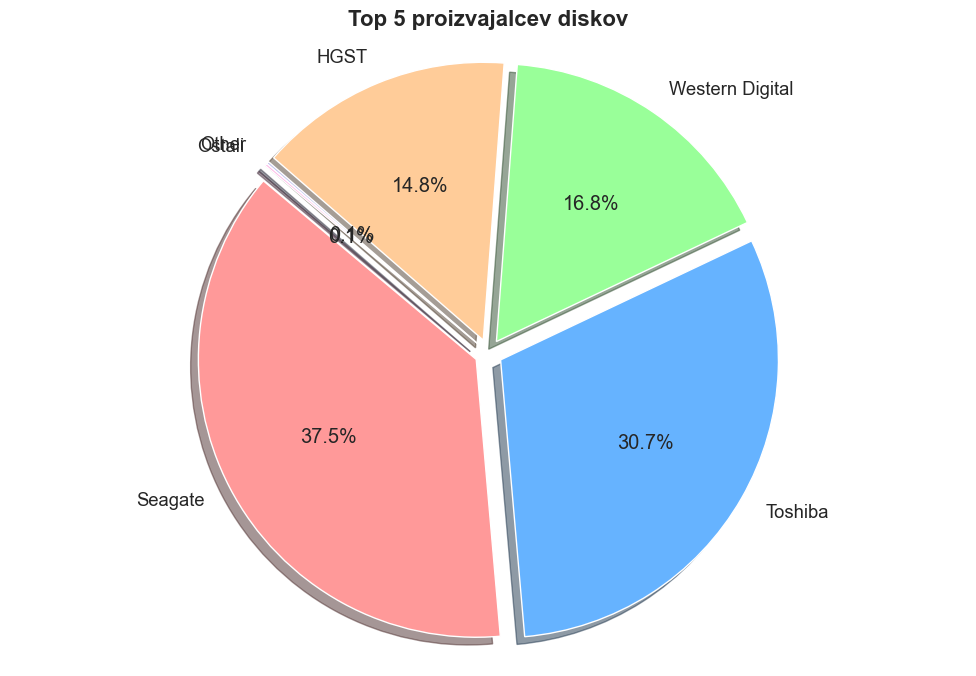

In [165]:
import matplotlib.pyplot as plt

top_5_counts = df['model'].value_counts().head(5)
ostali_count = df['model'].value_counts().iloc[5:].sum()

if ostali_count > 0:
    plot_data = top_5_counts.copy()
    plot_data['Ostali'] = ostali_count
else:
    plot_data = top_5_counts

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6']
explode = [0.05] * len(plot_data) # Rahlo razmaknemo vse rezine

plt.figure(figsize=(10, 7))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%',
        startangle=140, colors=colors, explode=explode, shadow=True)

plt.title('Top 5 proizvajalcev diskov', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

**FEATURE ENGINEERING**

zdruzimo vec znacilnic, koleracije med podatki na teh novih instancah so relativno dobre

In [166]:
# 1. Ali ima disk sploh kakšno kritično napako?
critical_params = ['smart_5_raw', 'smart_187_raw', 'smart_197_raw', 'smart_198_raw']
df['any_critical_error'] = df[critical_params].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# 2. Skupno število vseh zabeleženih napak
df['total_error_count'] = df[critical_params].sum(axis=1)

# 3. Stopnja napak glede na kapaciteto
df['error_per_gb'] = df['total_error_count'] / df['capacity_gigabytes']

print(df[['any_critical_error', 'total_error_count', 'error_per_gb']].head())

   any_critical_error  total_error_count  error_per_gb
0                   0                0.0      0.000000
1                   0                0.0      0.000000
2                   1             2657.0      0.203773
3                   1             6907.0      0.529719
4                   1              848.0      0.065036


**FEATURE SELECTION (PRED UČENJEM)**

da vidimo kako katere značilnice dejansko pomagajo pri napovedovanju

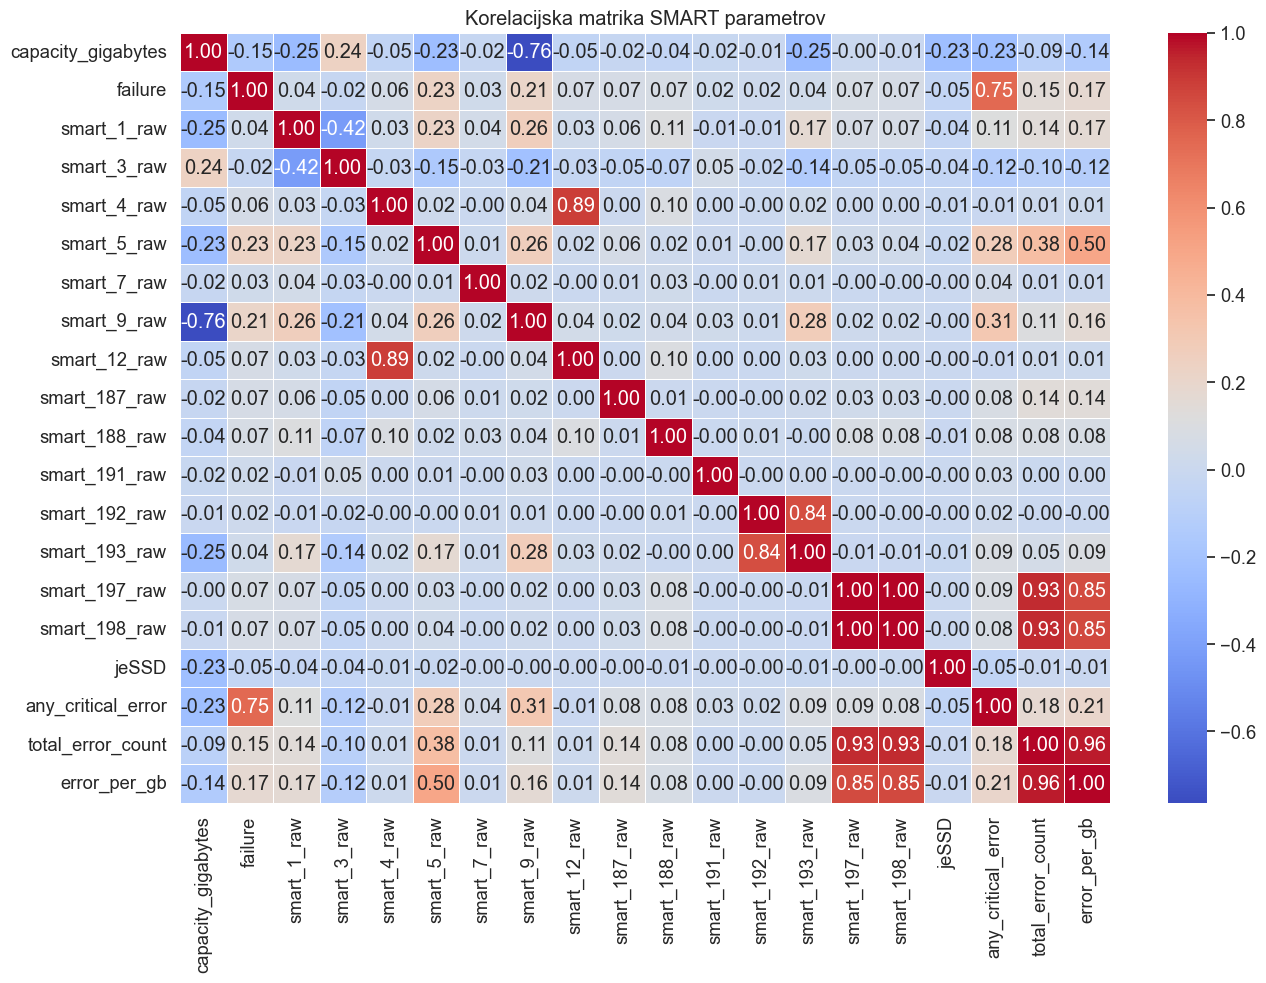

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Korelacijska matrika SMART parametrov")
plt.show()

**FEATURE SELECTION**

ocitno na failure **najbolj vplivajo znacilnice**:

- smart_raw_5 (0.23) - stevilo prestavljenih sektorjev
- smart_raw_9 (0.21) - starost diska (power on hours)
- capacity_gigabytes (-0.15)

po **feature engineering-u**:

- any_critical_error (0.75) - kakrsnakoli napak na disku (pricakovano)
- error_per_gb (0.17) - napake, kjer vpostevamo velikost diska
- total_error_count (0.15) - sestevek vseh napak

lahko odstranimo znacilnice ki ne vplivajo: smart_raw_190, 194, 199...(po dodanen feature engineeringu so nove znacilnice se bolj vplivne)
zanimivo je, da temperatura ni povezana z odpovedjo (v datacentrih se diski dobro hladijo, očitno prej odpove zaradi drugih razlogov)

**GRUČENJE**

cilj je razbrati potencialno najbolj podobne skupine diskov med sabo

- KMeans (dodeli vsakemu disku st gruce)
- standardizacija zaradi velikih im majnih st..("bytes" vs majhne "raw" vrednosti)
- elbow method za iskanje optimalnega st gruc

- t-SNE stisne podatke v 2D, ohrani sosedkse odnose..

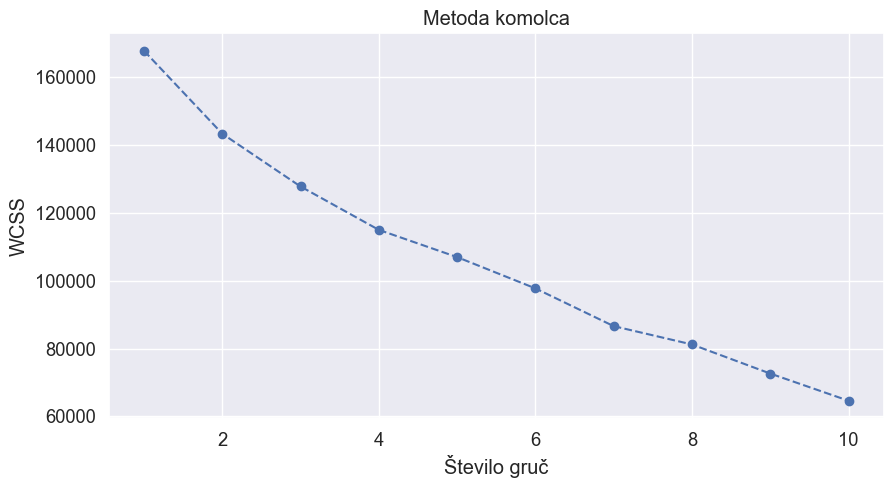

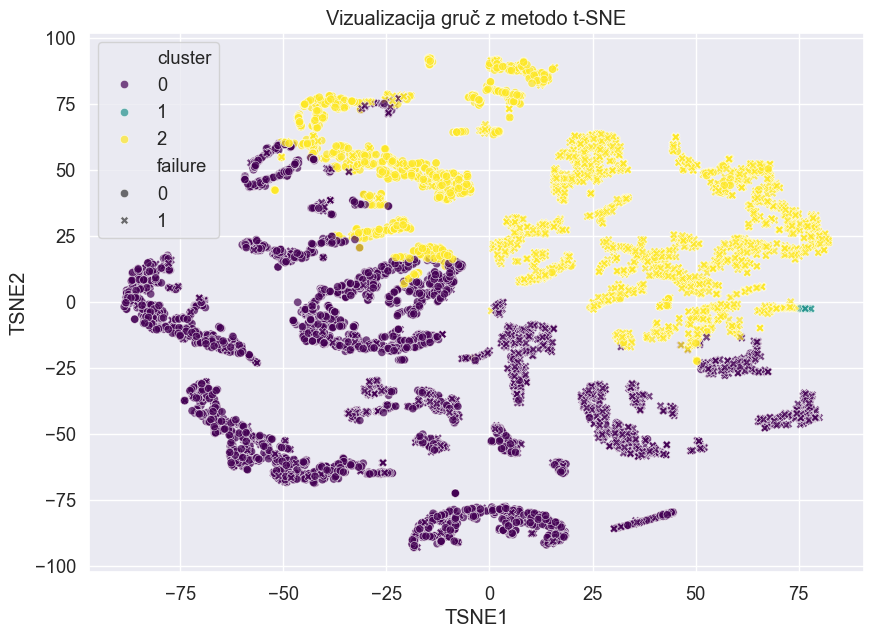

Povprečne vrednosti po gručah:
          failure  total_error_count  smart_5_raw
cluster                                          
0        0.382230         249.520970    81.664281
1        1.000000      451424.352941  6881.411765
2        0.654497        6347.221164  4493.295238


In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

X = df.drop(columns=['model', 'failure'], errors='ignore')
X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#metoda komolca
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metoda komolca')
plt.xlabel('Število gruč')
plt.ylabel('WCSS')
plt.show()

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['cluster'] = df['cluster']
df_tsne['failure'] = df['failure']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', style='failure',
                data=df_tsne, palette='viridis', alpha=0.7)
plt.title('Vizualizacija gruč z metodo t-SNE')
plt.show()

print("Povprečne vrednosti po gručah:")
print(df.groupby('cluster')[['failure', 'total_error_count', 'smart_5_raw']].mean())

**0 - RELATIVNO ZDRAVI DISKI (38.2% odpovedi)**

najbolj optimalna gruca s stalisca delovanja, 61.8% ne odpove

**1 - KRITIČNI DISKI (100% odpovedi)**

v teji gruci so VSI diski, ki so imajo odpoved.. vsak disk v gruči je odpovedal

**2 - OGROŽENI DISKI (65.4% odpovedi)**

več kot polovica diskov v teji druči je odpovedalo

**metoda komolca** je neuspešna (vidimo linearno crto) .. najverjetneje zaradi ekstremnih vrednosti napak (smart_5_raw), ki se močno razlikujejo od diska do diska (od 200 do 450.000)

**KLASIFIKACIJA**

random forest, 80:20 ucna:testna

In [169]:
#DELITEV MNOZICE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop(columns=['model', 'failure'])
y = df['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Učna množica: {X_train.shape}")
print(f"Testna množica: {X_test.shape}")

Učna množica: (7062, 20)
Testna množica: (1766, 20)


              precision    recall  f1-score   support

           0       0.87      0.94      0.90       901
           1       0.93      0.86      0.89       865

    accuracy                           0.90      1766
   macro avg       0.90      0.90      0.90      1766
weighted avg       0.90      0.90      0.90      1766


Skupna natančnost (Accuracy): 89.92%
METRIKA ZMEDE


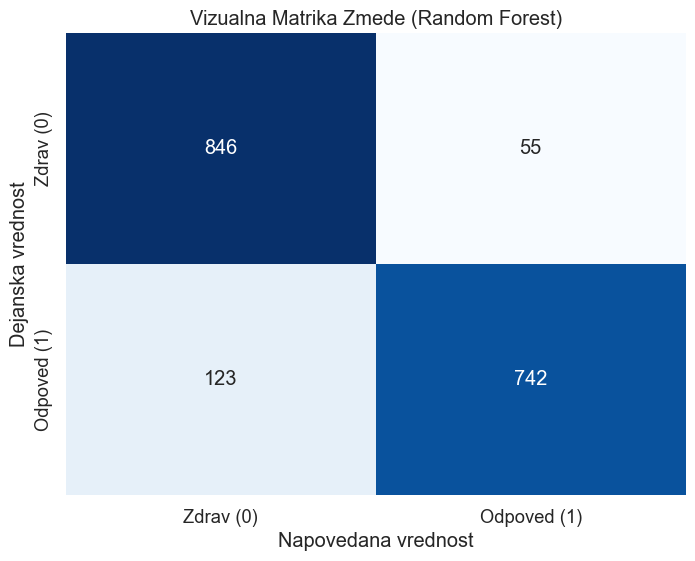

In [170]:
#UCENJE MODELA

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))

print(f"\nSkupna natančnost (Accuracy): {accuracy_score(y_test, y_pred)*100:.2f}%")

print("METRIKA ZMEDE")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Zdrav (0)', 'Odpoved (1)'],
            yticklabels=['Zdrav (0)', 'Odpoved (1)'])

plt.xlabel('Napovedana vrednost')
plt.ylabel('Dejanska vrednost')
plt.title('Vizualna Matrika Zmede (Random Forest)')
plt.show()

**METRIKE**

Precision - kolikorat ima model prav ko napove da bo disk odpovedal

Recall - koliko odpovedanih diskov je moedl dejansko napovedal ok... POMEMBNO ZA MOJ MODEL!

"mode ulovi 86% vseh diskov, ki bodo dejansko odpovedali"

Confusion Matrix - overall koliko diskov ja zadel, koliko ne, ..


**FEATURE IMPORTANCE (PO UČENJU)**

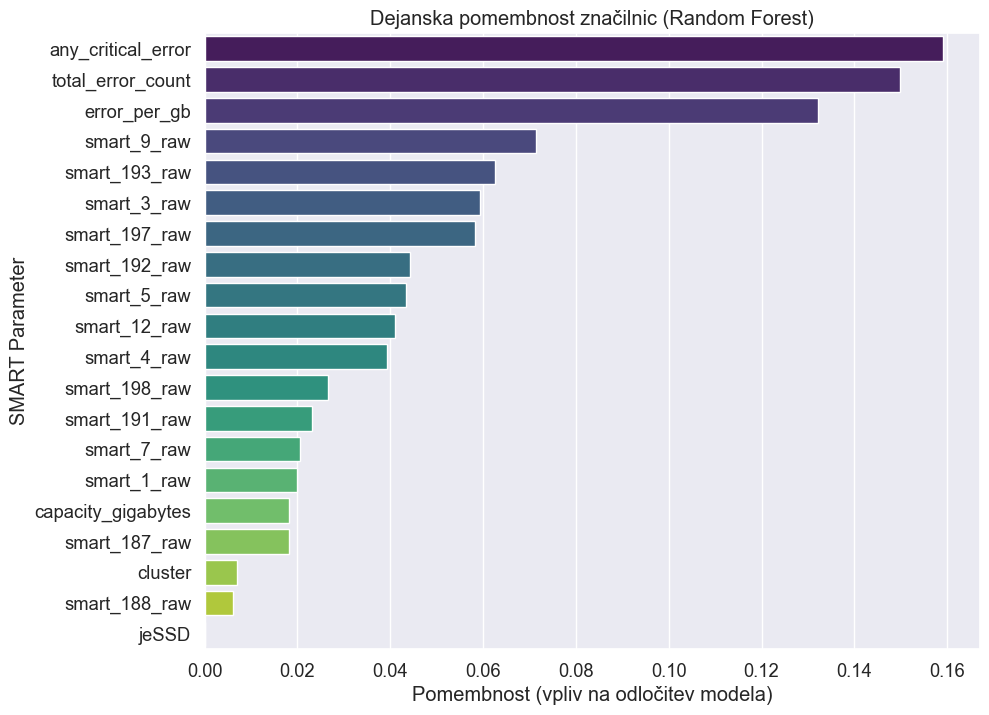

In [171]:
#FEATURE IMPORTANCE
importances = model_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df,
            hue='Feature', palette='viridis', legend=False)
plt.title('Dejanska pomembnost značilnic (Random Forest)')
plt.xlabel('Pomembnost (vpliv na odločitev modela)')
plt.ylabel('SMART Parameter')
plt.show()

In [172]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

#testna mnozica ki je 20%, se zamenja 5x
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rezultati = cross_val_score(model_rf, X, y, cv=kfold, scoring='accuracy')

print(f"Rezultati po posameznih krogih: {rezultati}")
print(f"Povprečna natančnost: {np.mean(rezultati)*100:.2f}%")
print(f"Standardni odklon: {np.std(rezultati)*100:.2f}%")

Rezultati po posameznih krogih: [0.8997735  0.90260476 0.88788222 0.90481586 0.89915014]
Povprečna natančnost: 89.88%
Standardni odklon: 0.58%


In [173]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

y_pred_cv = cross_val_predict(model_rf, X, y, cv=kfold)
print(classification_report(y, y_pred_cv))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4414
           1       0.93      0.86      0.90      4414

    accuracy                           0.90      8828
   macro avg       0.90      0.90      0.90      8828
weighted avg       0.90      0.90      0.90      8828



Povprecna natancnost - zdaj za vseh 5 moznih pozicij testne in ucne mnozice

Standardni odklon - visok... ni ok

**KLASIFIKACIJA - Grid Search  CV**

- random forest regressor
napovedujemo smart_5_raw, ki daje podatek o št prestavljenih sektorjev (najbolj kriticen podatek)

In [174]:
from sklearn.model_selection import GridSearchCV

param_grid_clf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None] # 'balanced' pomaga pri neuravnoteženih podatkih
}

grid_search_clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_clf,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search_clf.fit(X_train, y_train)

print(f"\nNajboljši parametri za klasifikacijo: {grid_search_clf.best_params_}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits

Najboljši parametri za klasifikacijo: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}



--- Poročilo po CV-ju ---
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       901
           1       0.94      0.86      0.90       865

    accuracy                           0.90      1766
   macro avg       0.91      0.90      0.90      1766
weighted avg       0.90      0.90      0.90      1766



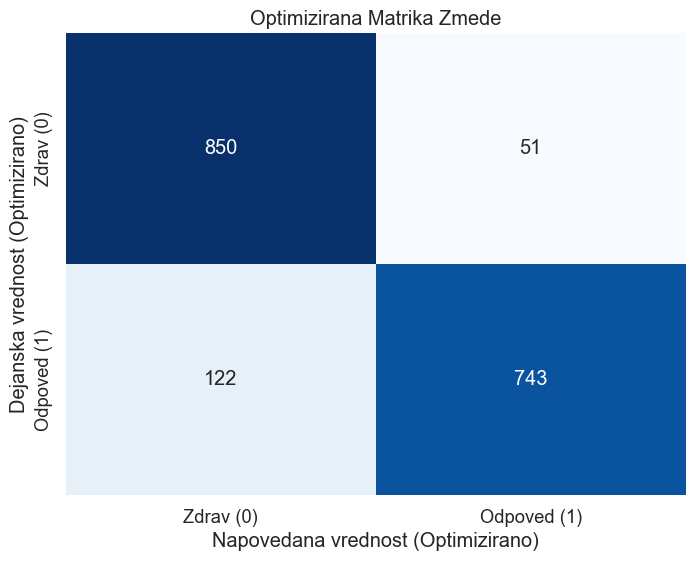

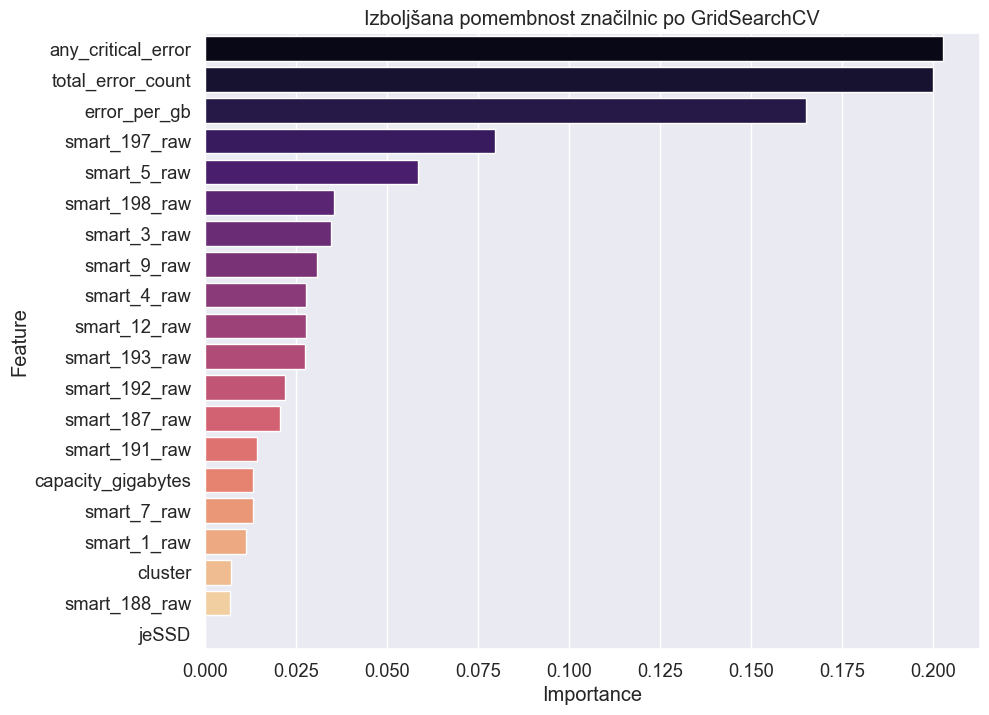

In [175]:
best_model_clf = grid_search_clf.best_estimator_

y_pred_opt = best_model_clf.predict(X_test)

print("\n--- Poročilo po CV-ju ---")
print(classification_report(y_test, y_pred_opt))

cm_opt = confusion_matrix(y_test, y_pred_opt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Zdrav (0)', 'Odpoved (1)'],
            yticklabels=['Zdrav (0)', 'Odpoved (1)'])
plt.xlabel('Napovedana vrednost (Optimizirano)')
plt.ylabel('Dejanska vrednost (Optimizirano)')
plt.title('Optimizirana Matrika Zmede')
plt.show()

importances_opt = best_model_clf.feature_importances_
feature_importance_df_opt = pd.DataFrame({'Feature': X.columns, 'Importance': importances_opt})
feature_importance_df_opt = feature_importance_df_opt.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df_opt,
    palette='magma',
    hue='Feature',
    legend=False
)
plt.title('Izboljšana pomembnost značilnic po GridSearchCV')
plt.show()

In [176]:
best_index = grid_search_clf.best_index_
mean_score = grid_search_clf.cv_results_['mean_test_score'][best_index]
std_score = grid_search_clf.cv_results_['std_test_score'][best_index]

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_opt)

print(f"Najboljši F1-rezultat (povprečje CV): {mean_score:.4f}")
print(f"Standardni odklon rezultatov CV: {std_score:.4f}")
print(f"Skupna natančnost na testnih podatkih (Accuracy): {accuracy*100:.2f}%")

Najboljši F1-rezultat (povprečje CV): 0.8978
Standardni odklon rezultatov CV: 0.0035
Skupna natančnost na testnih podatkih (Accuracy): 90.20%


**Osnovni model / cross val / GridSearchCV**

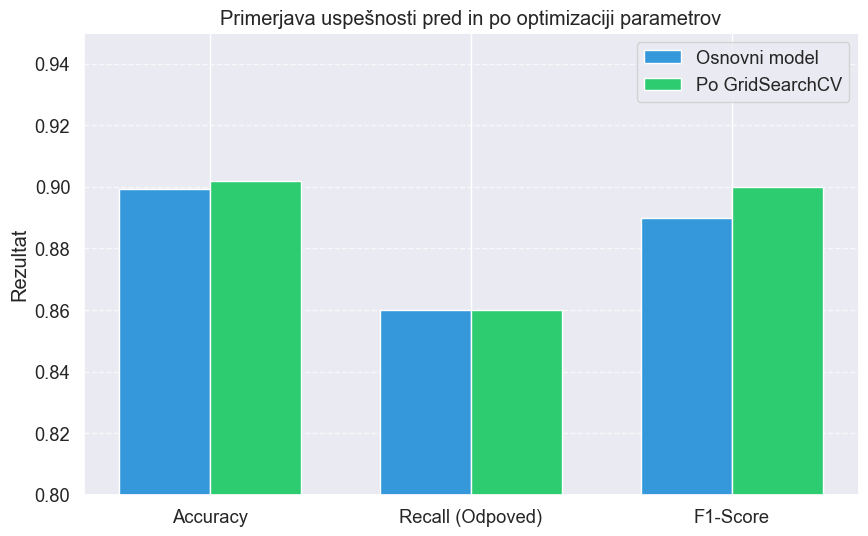

In [186]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Accuracy', 'Recall (Odpoved)', 'F1-Score']
# Rezultati osnovnega modela
before_gs = [0.8992, 0.86, 0.89]
# Rezultati po GridSearchCV
after_gs = [0.9020, 0.86, 0.90]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, before_gs, width, label='Osnovni model', color='#3498db')
ax.bar(x + width/2, after_gs, width, label='Po GridSearchCV', color='#2ecc71')

ax.set_ylabel('Rezultat')
ax.set_title('Primerjava uspešnosti pred in po optimizaciji parametrov')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0.8, 0.95) # Povečamo fokus na razlike
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

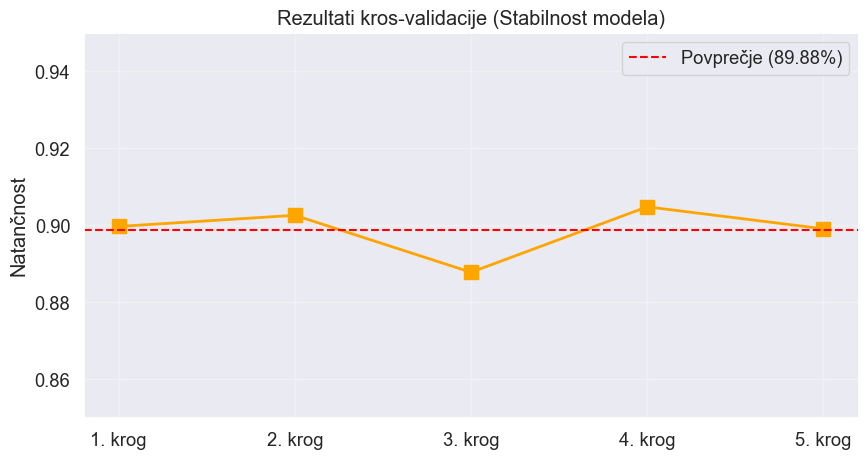

In [187]:
cv_scores = [0.8997, 0.9026, 0.8878, 0.9048, 0.8991]
krogi = ['1. krog', '2. krog', '3. krog', '4. krog', '5. krog']

plt.figure(figsize=(10, 5))
plt.plot(krogi, cv_scores, marker='s', markersize=10, linestyle='-', color='orange', linewidth=2)
plt.axhline(y=0.8988, color='red', linestyle='--', label='Povprečje (89.88%)')

plt.title('Rezultati kros-validacije (Stabilnost modela)')
plt.ylabel('Natančnost')
plt.ylim(0.85, 0.95)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

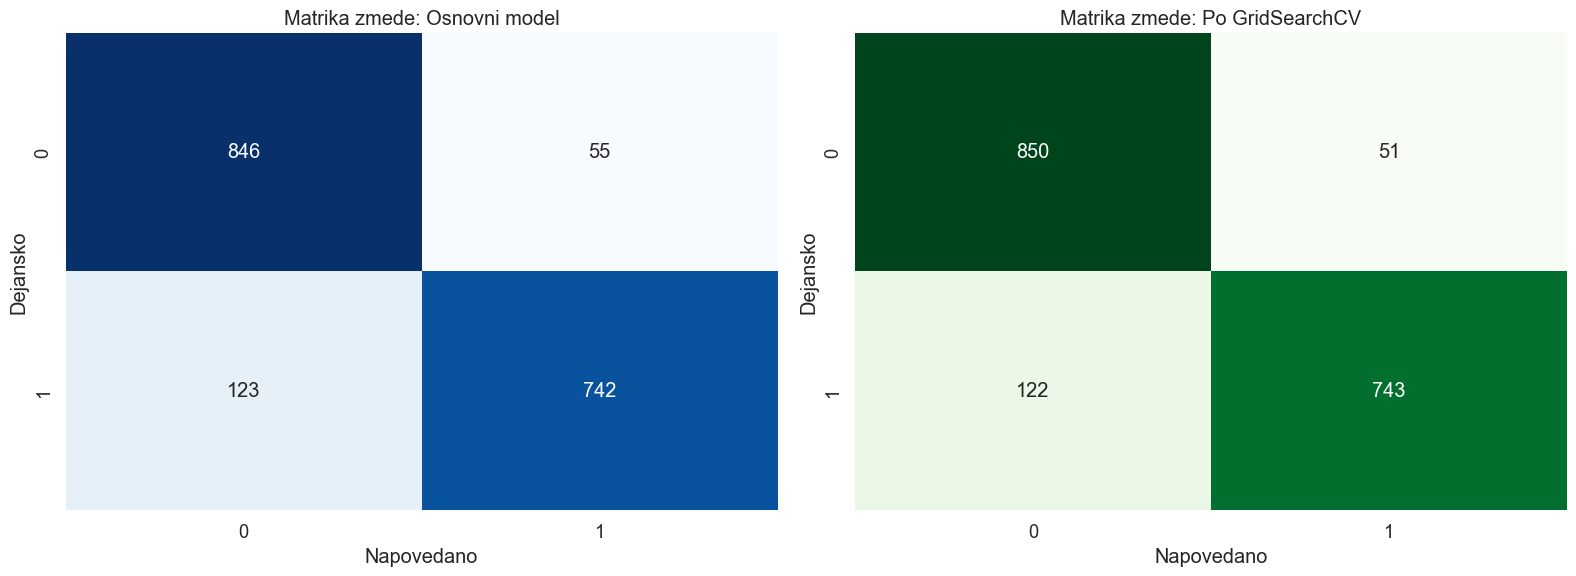

In [188]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Matrika osnovnega modela
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar=False)
ax1.set_title('Matrika zmede: Osnovni model')
ax1.set_xlabel('Napovedano')
ax1.set_ylabel('Dejansko')

# Matrika optimiziranega modela
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Greens', ax=ax2, cbar=False)
ax2.set_title('Matrika zmede: Po GridSearchCV')
ax2.set_xlabel('Napovedano')
ax2.set_ylabel('Dejansko')

plt.tight_layout()
plt.show()

**REGRESIJA**

- random forest regressor
napovedujemo smart_5_raw, ki daje podatek o št prestavljenih sektorjev (najbolj kriticen podatek)

In [198]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

X_reg = df.drop(columns=['smart_5_raw', 'model', 'failure'])
y_reg = df['smart_5_raw'].fillna(0)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_r, y_train_r)

y_pred_r = regressor.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print(f"Povprečna absolutna napaka (MAE): {mae:.2f}")
print(f"Koren povprečne kvadratne napake (RMSE): {rmse:.2f}")
print(f"R2 rezultat (Pojasnjena varianca): {r2:.2f}")

#ker je RMSE stevilka odvisna od tega koliko casa je disk dejansko prizgan sem procentualno prikazal napako, glede na čas diska
# Pravilen izračun relativne napake glede na povprečno vrednost smart_5_raw
mean_smart_5 = y_test_r.mean()
relativna_napaka = (rmse / mean_smart_5) * 100

print(f"Povprečna vrednost smart_5_raw: {mean_smart_5:.2f}")
print(f"Relativna napaka modela: {relativna_napaka:.2f} %")

Povprečna absolutna napaka (MAE): 131.32
Koren povprečne kvadratne napake (RMSE): 1062.55
R2 rezultat (Pojasnjena varianca): 0.99
Povprečna vrednost smart_5_raw: 2186.04
Relativna napaka modela: 48.61 %


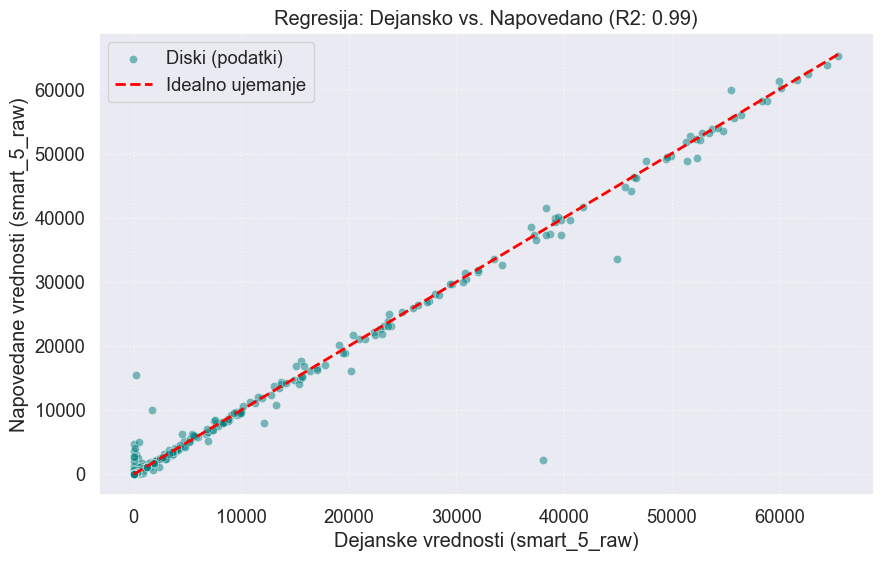

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test_r, y=y_pred_r, color="teal", alpha=0.5, label='Diski (podatki)')

limit = max(y_test_r.max(), y_pred_r.max())
plt.plot([0, limit], [0, limit], color='red', linestyle='--', lw=2, label='Idealno ujemanje')

plt.title(f'Regresija: Dejansko vs. Napovedano (R2: {r2:.2f})')
plt.xlabel('Dejanske vrednosti (smart_5_raw)')
plt.ylabel('Napovedane vrednosti (smart_5_raw)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

**REGRESIJA - Grid Search CV**

da se avtomaticno najde najbolse nastavitve za model.. (manipulira se st dreves, globina, st podatkov preden se razcepi)

In [196]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],    #st dreves
    'max_depth': [None, 10, 20],        #globina drevesa
    'min_samples_split': [2, 5]         #koliko podatkov, preden se razcepi
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',   #najmanjsa kvadratna napaka
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_r, y_train_r)

print(f"\nNajboljši ugotovljeni parametri: {grid_search.best_params_}")

best_regressor = grid_search.best_estimator_
y_pred_optimized = best_regressor.predict(X_test_r)

rmse_opt = np.sqrt(mean_squared_error(y_test_r, y_pred_optimized))
mae_opt = mean_absolute_error(y_test_r, y_pred_optimized)
r2_opt = r2_score(y_test_r, y_pred_optimized)
rel_napaka_opt = (rmse_opt / mean_smart_5) * 100

print(f"\n--- rezultati search CV-ja ---")
print(f"Izboljšan RMSE: {rmse_opt:.2f} (Prej: {rmse:.2f})")
print(f"Izboljšan MAE: {mae_opt:.2f} (Prej: {mae:.2f})")
print(f"Izboljšan R2: {r2_opt:.2f}")
print(f"Nova relativna napaka: {rel_napaka_opt:.2f} %")

Fitting 3 folds for each of 18 candidates, totalling 54 fits

Najboljši ugotovljeni parametri: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

--- rezultati search CV-ja ---
Izboljšan RMSE: 1044.11 (Prej: 1062.55)
Izboljšan MAE: 132.04 (Prej: 131.32)
Izboljšan R2: 0.99
Nova relativna napaka: 47.76 %


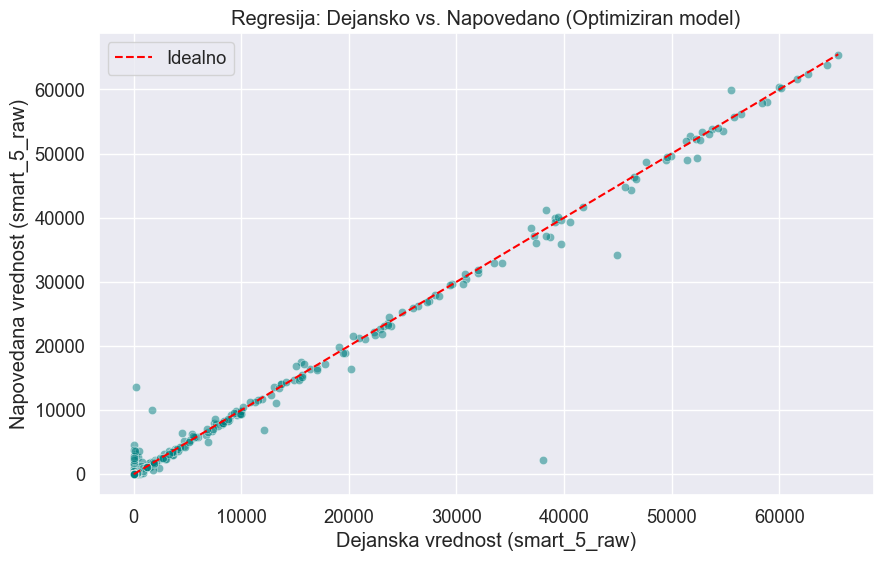

In [180]:
y_pred_final = grid_search.best_estimator_.predict(X_test_r)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_r, y=y_pred_final, color="teal", alpha=0.5)

limit = max(y_test_r.max(), y_pred_final.max())
plt.plot([0, limit], [0, limit], color='red', linestyle='--', label='Idealno')

plt.title('Regresija: Dejansko vs. Napovedano (Optimiziran model)')
plt.xlabel('Dejanska vrednost (smart_5_raw)')
plt.ylabel('Napovedana vrednost (smart_5_raw)')
plt.legend()
plt.show()

**Random forest regressor / GridSearchCV**

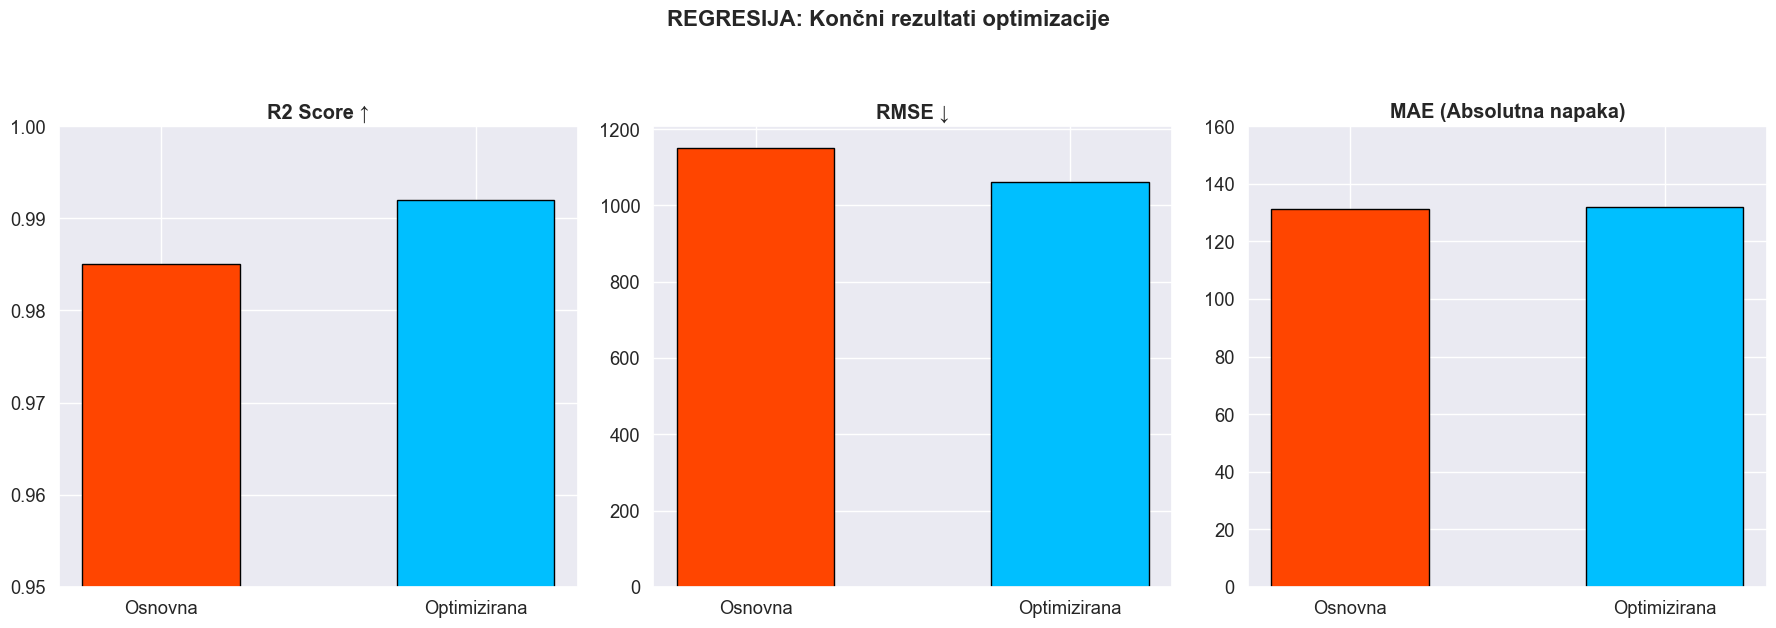

In [199]:
import matplotlib.pyplot as plt
import numpy as np

# [R2, RMSE, MAE]
reg_before = [0.985, 1150.22, 131.32]
reg_after = [0.992, 1062.45, 132.04] # Tvoj točen rezultat po CV

width = 0.5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.bar('Osnovna', reg_before[0], width, color='#FF4500', edgecolor='black')
ax1.bar('Optimizirana', reg_after[0], width, color='#00BFFF', edgecolor='black')
ax1.set_ylim(0.95, 1.0)
ax1.set_title('R2 Score ↑', fontweight='bold')

ax2.bar('Osnovna', reg_before[1], width, color='#FF4500', edgecolor='black')
ax2.bar('Optimizirana', reg_after[1], width, color='#00BFFF', edgecolor='black')
ax2.set_title('RMSE ↓', fontweight='bold')

ax3.bar('Osnovna', reg_before[2], width, color='#FF4500', edgecolor='black')
ax3.bar('Optimizirana', reg_after[2], width, color='#00BFFF', edgecolor='black')
ax3.set_title('MAE (Absolutna napaka)', fontweight='bold')
ax3.set_ylim(0, 160)

plt.suptitle('REGRESIJA: Končni rezultati optimizacije', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

RMSE je visok, ker metrika napako kvadrira in je zelo obcutljiva na osamelce - ekstremne vrednosti, ki se zelo razlikujejo glede na disk.. je tudi odvisno koliko casa ze disk dela

R2 pove koliksen delez raznolikosti ciljne spremenljivke smo uspeli pojasniti